# Decision Tree Classification-We want to predict  salary of employee would be more than 50000 or not

# Import  Reqrired Libraries

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # statistical data visualization


from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split#Train Test Split
from sklearn import metrics
from sklearn.tree import plot_tree




In [ ]:
cd C:\Mehul Session\Session 27_Python Introduction\LMS FT\LMS Python\1_Python_Session_File\5_Machine Learning\4_Decision Tree\FT_Session_Decision Tree

# Import Dataset

In [4]:
data=pd.read_csv("ML Decision Tree Resources 16936475981.csv")

In [5]:
data

,company,job,degree,salary_more_then_50000
0,Reliance,sales executive,bachelors,0
1,Reliance,sales executive,masters,0
2,Reliance,business manager,bachelors,1
3,Reliance,business manager,masters,1
4,Reliance,computer programmer,bachelors,0
5,Reliance,computer programmer,masters,1
6,Torrent,sales executive,masters,0
7,Torrent,computer programmer,bachelors,0
8,Torrent,business manager,bachelors,0
9,Torrent,business manager,masters,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   company                 16 non-null     object
 1   job                     16 non-null     object
 2   degree                  16 non-null     object
 3   salary_more_then_50000  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [7]:
data.isnull().sum()

company                   0
job                       0
degree                    0
salary_more_then_50000    0
dtype: int64

In [13]:
 y = data['salary_more_then_50000']


In [14]:
x = data.drop('salary_more_then_50000',axis='columns')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
x=x.apply(le.fit_transform)

In [ ]:
x= x.apply(LabelEncoder().fit_transform)

In [19]:
x

,company,job,degree
0,0,2,0
1,0,2,1
2,0,0,0
3,0,0,1
4,0,1,0
5,0,1,1
6,2,2,1
7,2,1,0
8,2,0,0
9,2,0,1


# Train Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [21]:
X_train

,company,job,degree
13,1,0,1
11,1,2,1
8,2,0,0
9,2,0,1
2,0,0,0
15,1,1,1
4,0,1,0
7,2,1,0
10,1,2,0
12,1,0,0


In [22]:
X_train.shape

(12, 3)

In [23]:
X_test

,company,job,degree
0,0,2,0
1,0,2,1
5,0,1,1
14,1,1,0


In [24]:
Y_train.shape

(12,)

In [25]:
Y_train

13    1
11    1
8     0
9     1
2     1
15    1
4     0
7     0
10    1
12    1
3     1
6     0
Name: salary_more_then_50000, dtype: int64

In [26]:
Y_test

0     0
1     0
5     1
14    1
Name: salary_more_then_50000, dtype: int64

# Model Initilization

In [27]:

model = DecisionTreeClassifier()

In [28]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

criterion{“gini”, “entropy”}, default=”gini” The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

splitter{“best”, “random”}, default=”best” The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth int, default=None The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split int or float, default=2 The minimum number of samples required to split an internal node:

max_leaf_nodesint, default=None Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0 A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_splitfloat, default=0 Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

cp_alphanon-negative float, default=0.0 Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

random_stateint, RandomState instance, default=None Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer


In [29]:
model.score(X_train,Y_train)

1.0

In [30]:
model.score(X_test,Y_test)

0.75

In [31]:
y_pred  = model.predict(X_test)
y_pred

array([0, 0, 0, 1], dtype=int64)

In [32]:
metrics.confusion_matrix(Y_test, y_pred)

array([[2, 0],
       [1, 1]], dtype=int64)

In [33]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0



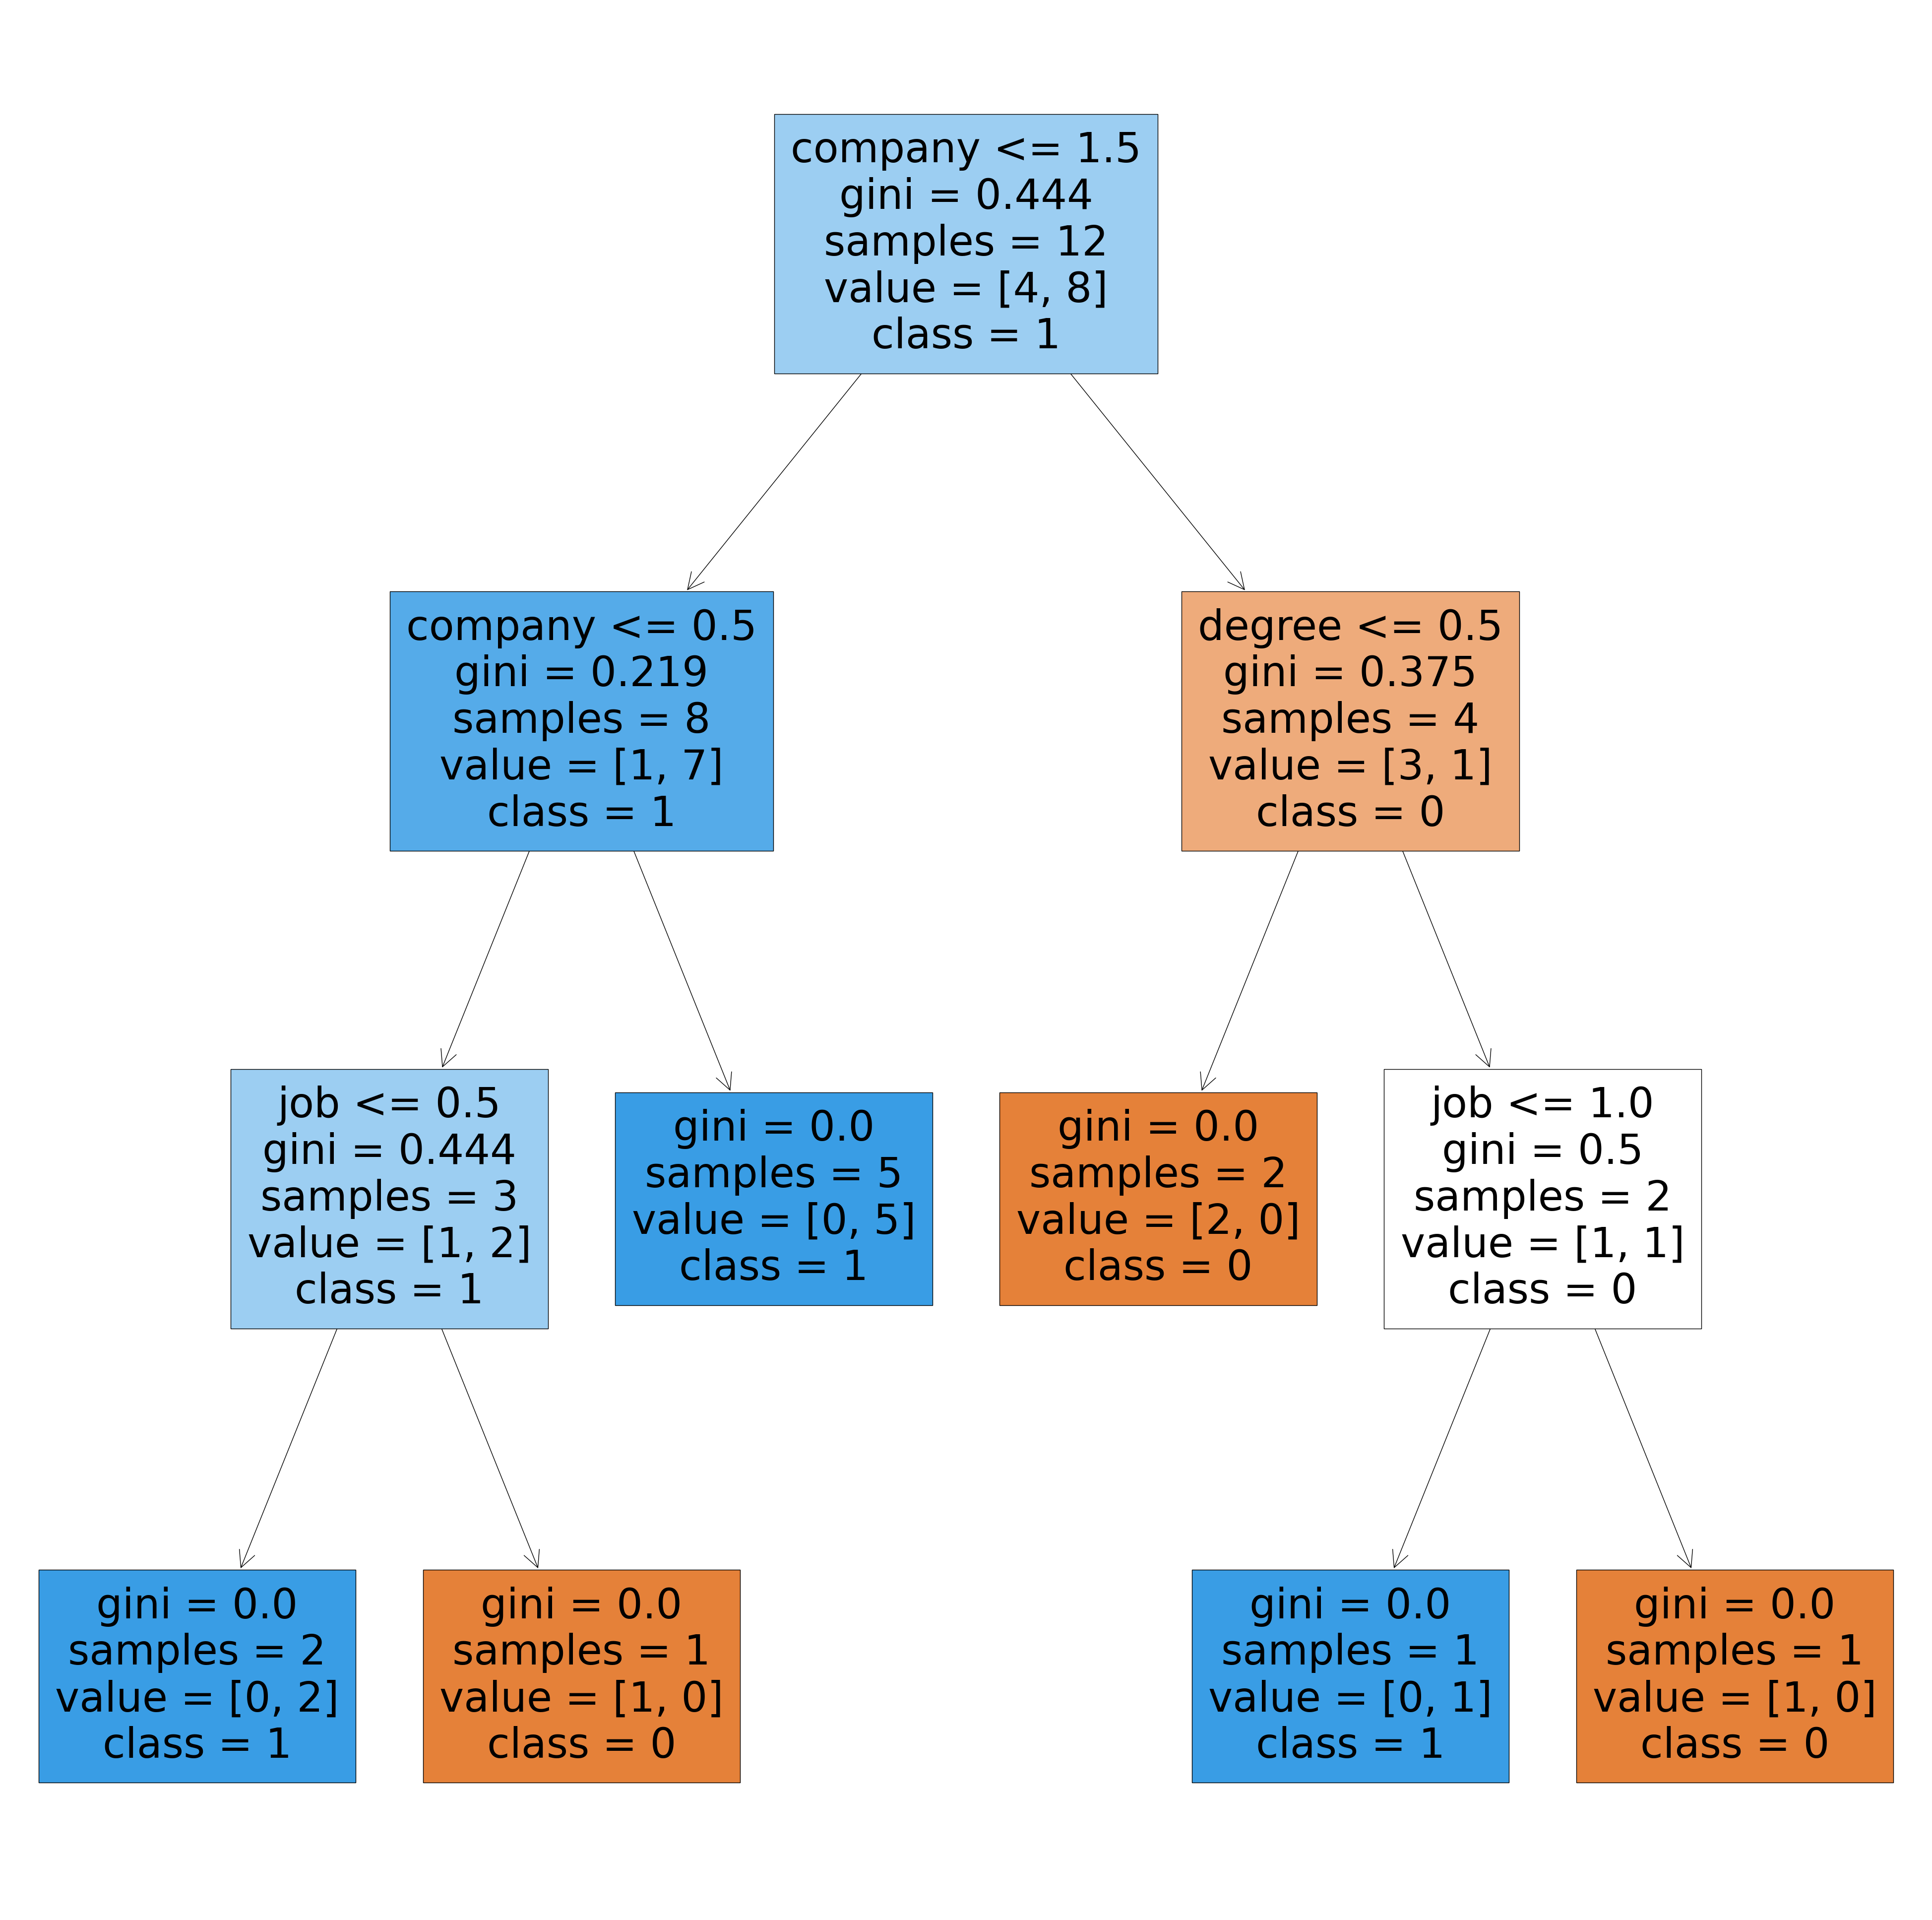

In [36]:
plt.figure(figsize=(50,50))

from sklearn import tree

tree.plot_tree(model,feature_names=input.columns,  
                   class_names=['0','1'],
                   filled=True);

# Prediction

In [ ]:
# 0-No Salary is not greater than 50000

In [49]:
model.predict([[1,2,0]])

C:\Users\kashy\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
# actual values
y_pred

In [ ]:
Y_test

# Confusion Matrix

In [ ]:
from sklearn import metrics 

In [39]:
# confusion matrix,accuracy,classification_report in sklearn
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

Confusion matrix : 
 [[1 1]
 [0 2]]


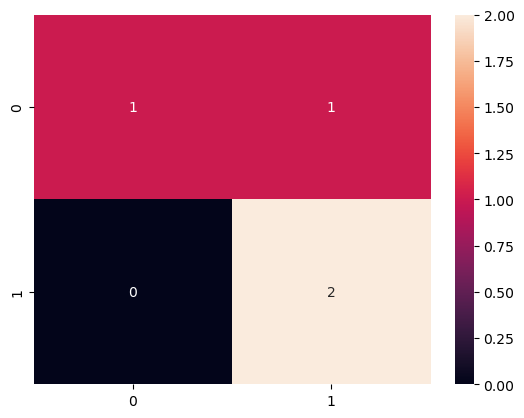

In [46]:
# confusion matrix
matrix = confusion_matrix(Y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
sns.heatmap(matrix,annot=True);

# Accuracy

In [47]:
accuracy = metrics.accuracy_score(Y_test,y_pred)

In [48]:
accuracy

0.75

In [50]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

75.0

# Classification Report

In [51]:
report=classification_report(Y_test,y_pred) 

In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



# Iris Dataset

In [53]:
from sklearn import datasets

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [54]:
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

In [55]:
ext_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 0



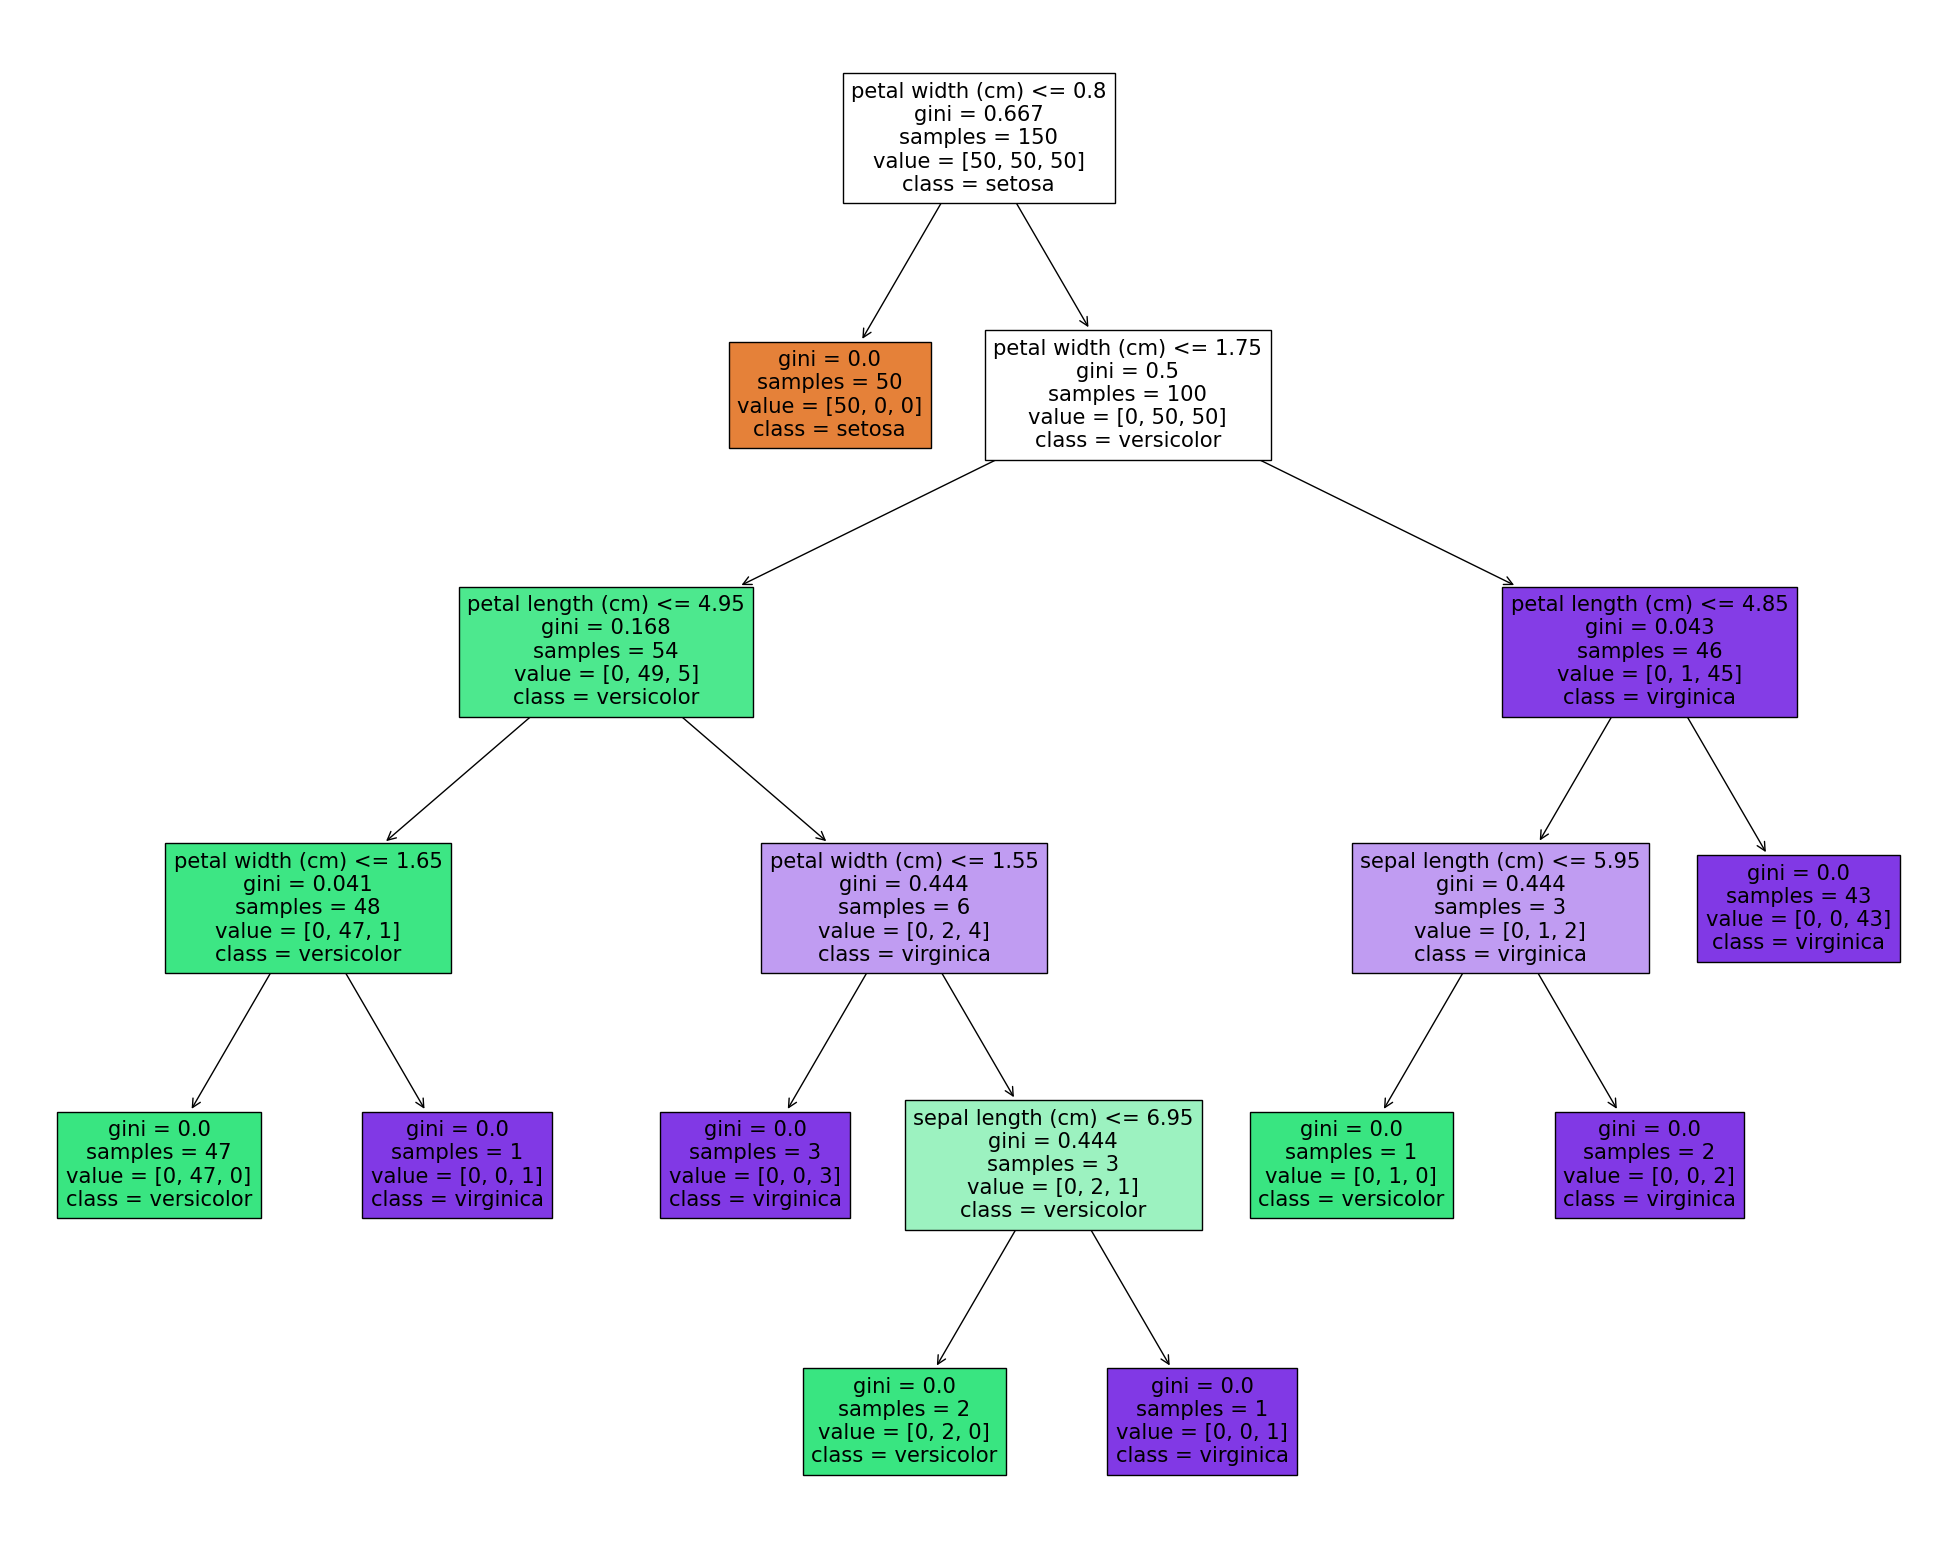

In [56]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)